# Title : G2M insight for Cab Investment firm 

## Author: Mufunwa Nemushungwa

## Date: 09 November 2023

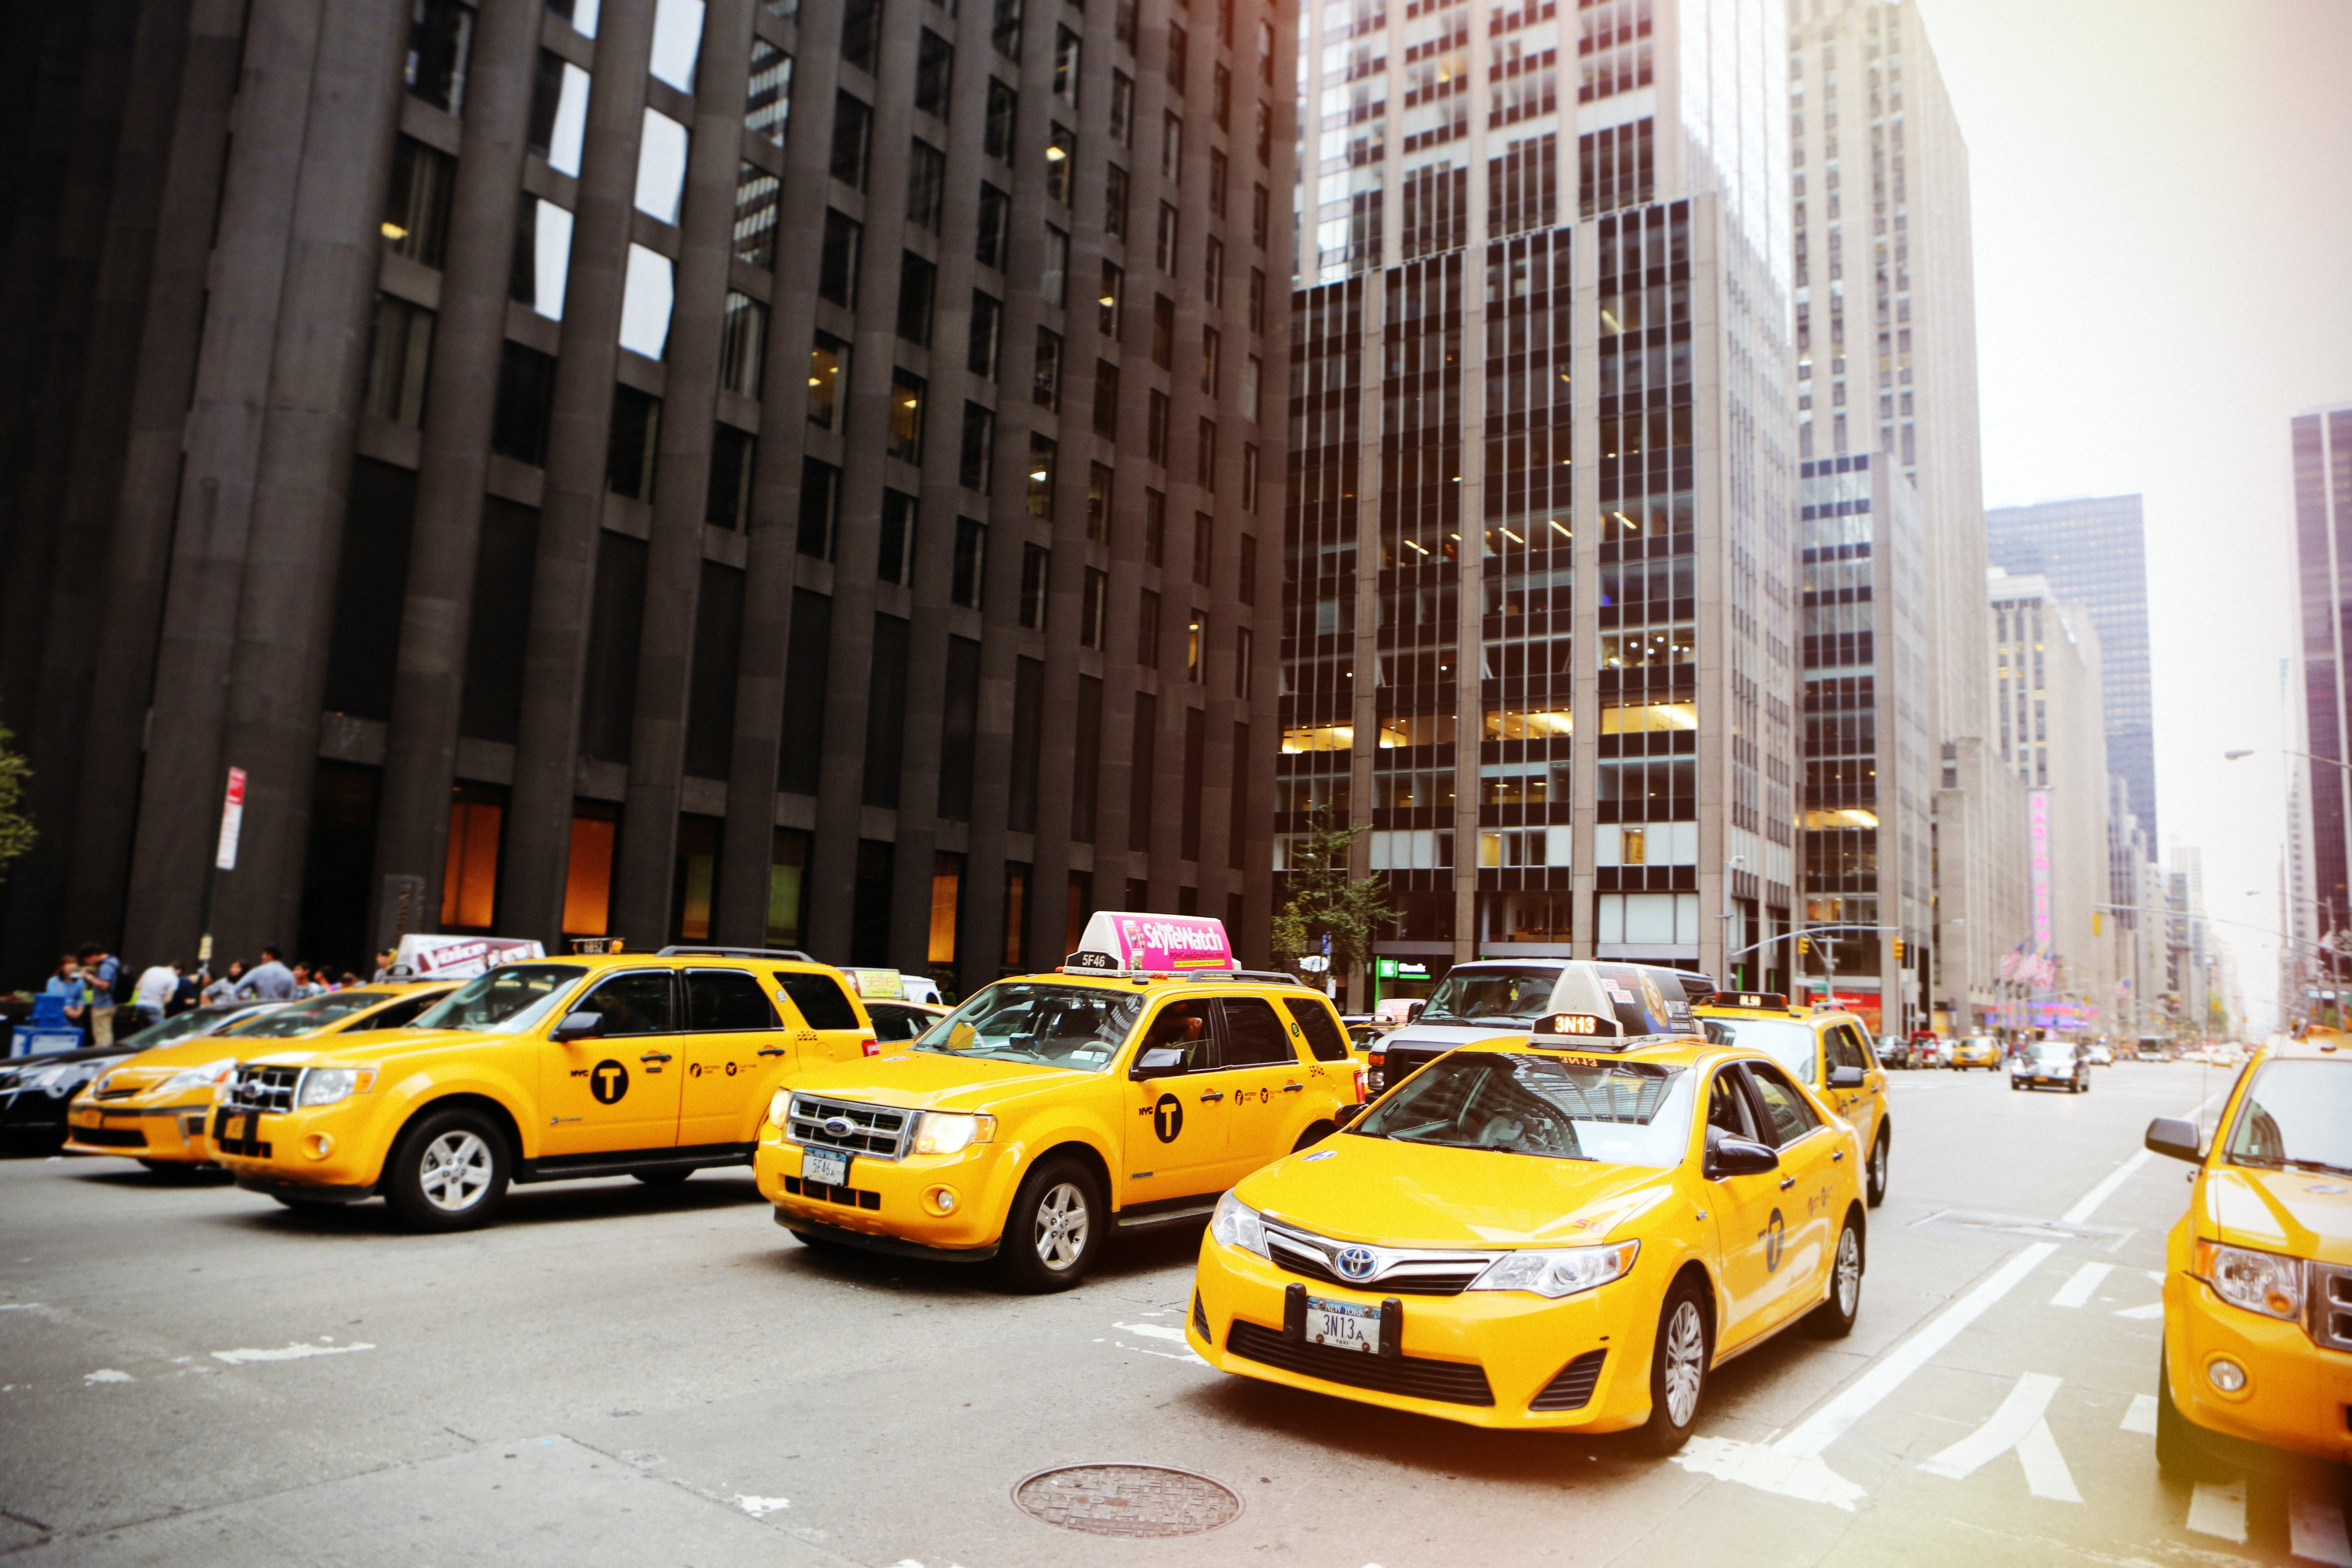

In [1]:
# Deliverables of Week 2 are:

# 1. EDA Notebook,

# 2. Data Intake report

# 3. EDA recommendation and hypothesis results

## Taking a quick look at the datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

sns.set_theme()

In [3]:
### Read in datasets
cab_df = pd.read_csv('Cab_Data.csv') ## cab dataset
city_df = pd.read_csv('City.csv')   ## city dataset
customers_df = pd.read_csv('Customer_ID.csv') ## customer dataset
transactions_df = pd.read_csv('Transaction_ID.csv') ## transactions dataset

In [4]:
### Cab dataset

In [5]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [7]:
cab_df.drop(columns=['Transaction ID']).describe()

,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000,359392.000000
mean,42964.067998,22.567254,423.443311,286.190113
std,307.467197,12.233526,274.378911,157.993661
min,42371.000000,1.900000,15.600000,19.000000
25%,42697.000000,12.000000,206.437500,151.200000
50%,42988.000000,22.440000,386.360000,282.480000
75%,43232.000000,32.960000,583.660000,413.683200
max,43465.000000,48.000000,2048.030000,691.200000


In [8]:
cab_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [9]:
### City dataset

In [10]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [11]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [12]:
city_df.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [13]:
city_df['Population']=city_df['Population'].apply(lambda x: x.replace(',', '')).astype('int64')
city_df['Users']=city_df['Users'].apply(lambda x: x.replace(',', '')).astype('int64')
city_df.dtypes

City          object
Population     int64
Users          int64
dtype: object

In [14]:
### Customer dataset

In [15]:
customers_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [17]:
customers_df.drop(columns=['Customer ID']).describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


In [18]:
customers_df.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [19]:
### Transactions dataset

In [20]:
transactions_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [21]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [22]:
transactions_df.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

## Merging datasets 

In [23]:
### Master data
master_df = transactions_df.merge(customers_df,on='Customer ID',how='inner')
master_df = master_df.merge(cab_df, on='Transaction ID',how='inner')
master_df = master_df.merge(city_df,on='City',how='inner')

In [24]:
master_df.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Date of Travel', 'Company', 'City',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')

In [25]:
new_column_order = ['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Date of Travel', 'Company', 'KM Travelled', 'Price Charged', 'Cost of Trip','City',
        'Population', 'Users']
master_df = master_df[new_column_order]
master_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,City,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,30.45,370.95,313.6350,ATLANTA GA,814885,24701
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,26.19,598.70,317.4228,ATLANTA GA,814885,24701
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,42.55,792.05,597.4020,ATLANTA GA,814885,24701
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,28.62,358.52,334.8540,ATLANTA GA,814885,24701
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,36.38,721.10,467.1192,ATLANTA GA,814885,24701


In [26]:
###changing date format of 'Date of Travel' feature

# Converting  Excel serial date is in the 'Date of Travel' column
master_df['Date of Travel'] = pd.to_datetime(master_df['Date of Travel'], unit='D', origin='1899-12-30')

print(master_df['Date of Travel'])


0        2016-01-08
1        2018-07-21
2        2018-11-23
3        2016-01-06
4        2018-04-21
            ...    
359387   2018-03-03
359388   2018-04-13
359389   2018-07-06
359390   2018-08-02
359391   2018-08-30
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]


In [27]:
master_df.dtypes

Transaction ID                 int64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Date of Travel        datetime64[ns]
Company                       object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
City                          object
Population                     int64
Users                          int64
dtype: object

In [28]:
master_df = master_df[master_df['Date of Travel'] > '2016-01-30']

In [29]:
us_holidays = pd.read_csv('US Holiday Dates (2004-2021).csv')
us_holidays.dtypes

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

In [30]:
us_holidays.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [31]:
us_holidays['Date'] = pd.to_datetime(us_holidays['Date'])
us_holidays.dtypes

Date       datetime64[ns]
Holiday            object
WeekDay            object
Month               int64
Day                 int64
Year                int64
dtype: object

In [32]:
master_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,City,Population,Users
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,26.19,598.70,317.4228,ATLANTA GA,814885,24701
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,42.55,792.05,597.4020,ATLANTA GA,814885,24701
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,36.38,721.10,467.1192,ATLANTA GA,814885,24701
5,10324737,27703,Cash,Male,27,9237,2018-05-04,Yellow Cab,6.18,138.40,87.5088,ATLANTA GA,814885,24701
6,10395626,27703,Card,Male,27,9237,2018-10-27,Pink Cab,13.39,167.03,141.9340,ATLANTA GA,814885,24701


## 1. Pricing Strategy:

"How do pricing strategies differ between the two cab companies, and how does this impact customer behavior?"
"Is there a price point at which the demand for cab services significantly increases or decreases?"

In [33]:
## Price analysis
pink_cab = master_df[master_df['Company'] == 'Pink Cab' ]
yellow_cab = master_df[master_df['Company'] == 'Yellow Cab']

In [34]:
# Calculate the average price charged for each company
avg_price_pink_cab = pink_cab['Price Charged'].mean()
avg_price_yellow_cab = yellow_cab['Price Charged'].mean()

print(f'Average Price Charged by Pink cab: {avg_price_pink_cab}')
print(f'Average Price Charged by Yellow cab: {avg_price_yellow_cab}')

Average Price Charged by Pink cab: 310.62323614673454
Average Price Charged by Yellow cab: 457.3962675004694


In [35]:
pink_cab = pink_cab.copy()
pink_cab['Price per km'] = pink_cab['Price Charged'] / pink_cab['KM Travelled']

yellow_cab = yellow_cab.copy()
yellow_cab['Price per km'] = yellow_cab['Price Charged'] / yellow_cab['KM Travelled']

avg_price_perKM_pink_cab = pink_cab['Price per km'].mean()
avg_price_perKM_yellow_cab = yellow_cab['Price per km'].mean()

print(f'Average Price Charged per km by Pink Cab: {avg_price_perKM_pink_cab}')
print(f'Average Price Charged per km by Yellow Cab: {avg_price_perKM_yellow_cab}')

Average Price Charged per km by Pink Cab: 13.761835711650024
Average Price Charged per km by Yellow Cab: 20.272201825415877


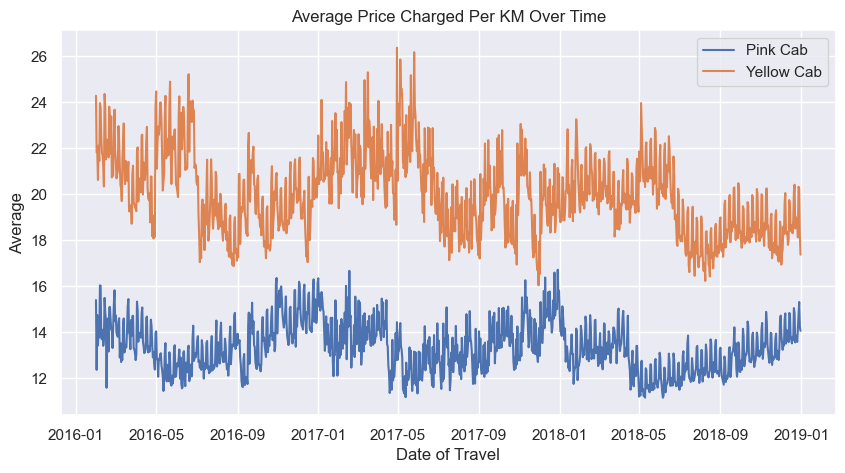

In [36]:
pink_stats = pink_cab.groupby('Date of Travel').mean('Price per km')
yellow_stats = yellow_cab.groupby('Date of Travel').mean('Price per km')

 
# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(pink_stats.index, pink_stats['Price per km'], label='Pink Cab')
plt.plot(pink_stats.index, yellow_stats['Price per km'], label='Yellow Cab')
plt.title('Average Price Charged Per KM Over Time')
plt.xlabel('Date of Travel')
plt.ylabel('Average')
plt.legend()
plt.grid(True)
plt.show()


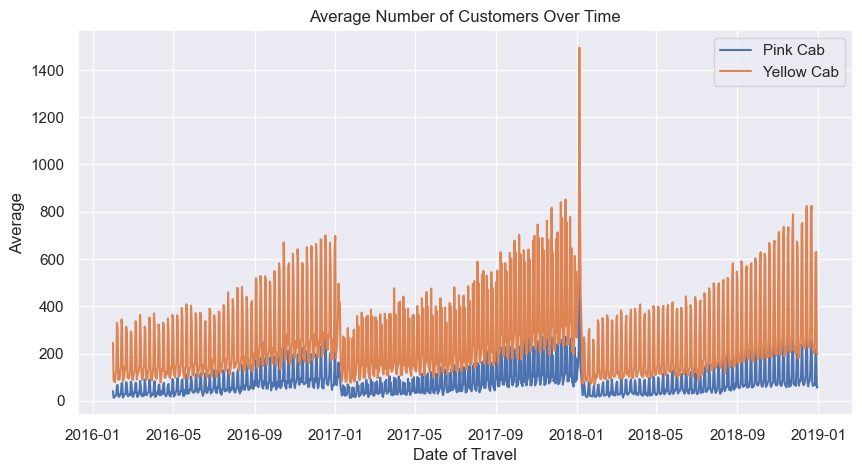

In [37]:
### Demand Analysis

pink_price = pink_cab.groupby('Date of Travel').agg({
   'Price Charged' : 'mean',
    'Customer ID'  : 'count'
})

pink_price.columns = ['Average priced charged','Number of customers']

yellow_price = yellow_cab.groupby('Date of Travel').agg({
   'Price Charged' : 'mean',
    'Customer ID'  : 'count'
})

yellow_price.columns = ['Average priced charged','Number of customers']
    
# Demand

# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(pink_price.index, pink_price['Number of customers'],label='Pink Cab')
plt.plot(yellow_price.index,yellow_price['Number of customers'], label='Yellow Cab')
plt.title('Average Number of Customers Over Time')
plt.xlabel('Date of Travel')
plt.ylabel('Average')
plt.legend()
plt.grid(True)
plt.show()


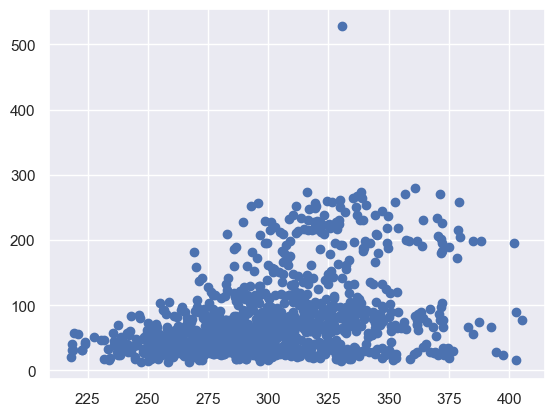

In [38]:
plt.scatter(x='Average priced charged',y='Number of customers',data=pink_price)
plt.show()

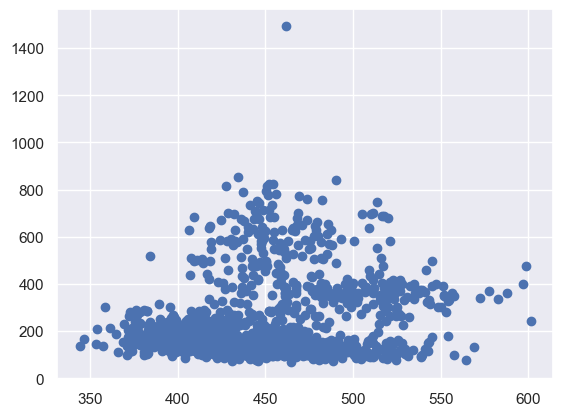

In [39]:
plt.scatter(x='Average priced charged',y='Number of customers',data=yellow_price)
plt.show()

## 2. Geographical Analysis:

"Is there a correlation between the population of a city and the number of cab users?"
"Do different cities exhibit different usage patterns, and can this be attributed to demographics or other factors?"


In [40]:
correlation = master_df['Population'].corr(master_df['Users'])
print(f"Correlation between Population and Number of Cab Users: {correlation}")

Correlation between Population and Number of Cab Users: 0.915635300994913


In [41]:
city_stats = master_df.groupby('City').agg({
    'Users': 'count',
    'Population': 'mean',
    'Income (USD/Month)': 'mean'
}).reset_index()

city_stats.columns = ['City','Number of users','Population','Average Income']
city_stats

,City,Number of users,Population,Average Income
0,ATLANTA GA,7456,814885.0,14945.171406
1,AUSTIN TX,4867,698371.0,14688.837888
2,BOSTON MA,29310,248968.0,15113.652371
3,CHICAGO IL,55773,1955130.0,15104.129113
4,DALLAS TX,6911,942908.0,14844.066126
5,DENVER CO,3780,754233.0,14965.264815
6,LOS ANGELES CA,47453,1595037.0,15064.927655
7,MIAMI FL,6418,1339155.0,14997.046432
8,NASHVILLE TN,2989,327225.0,14719.222148
9,NEW YORK NY,98925,8405837.0,15181.396138


In [42]:
city_stats = city_stats.copy()
city_stats['User Proportion'] = city_stats['Number of users']/city_stats['Population']
city_stats = city_stats.sort_values('User Proportion',ascending=False)

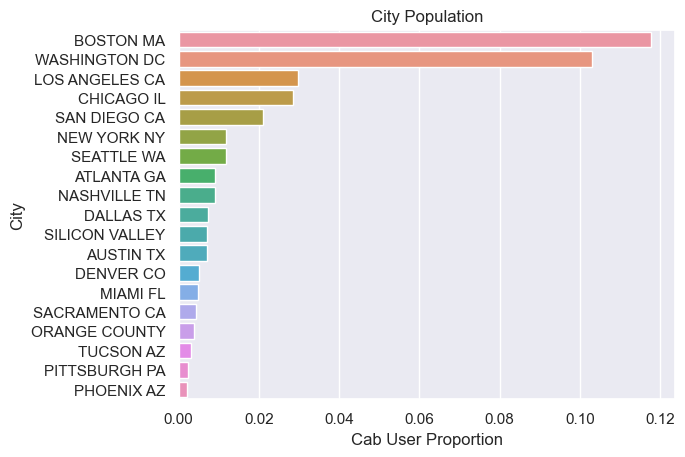

In [43]:
sns.barplot(x='User Proportion',y='City', data=city_stats,order=city_stats['City'])
plt.xlabel('Cab User Proportion')
plt.title('City Population')
plt.show()

In [44]:
### breakdown by company

city_data = master_df.groupby(['Company','City']).agg({
    'Users': 'count',
    'Population': 'mean',
    'Price Charged': 'mean'
}).reset_index()

city_data.columns = ['Company','City','Number of users','Population','Average Price Charged']
city_data.head()

,Company,City,Number of users,Population,Average Price Charged
0,Pink Cab,ATLANTA GA,1741,814885.0,301.969879
1,Pink Cab,AUSTIN TX,1861,698371.0,320.524352
2,Pink Cab,BOSTON MA,5115,248968.0,300.964733
3,Pink Cab,CHICAGO IL,9248,1955130.0,280.963950
4,Pink Cab,DALLAS TX,1356,942908.0,261.404926


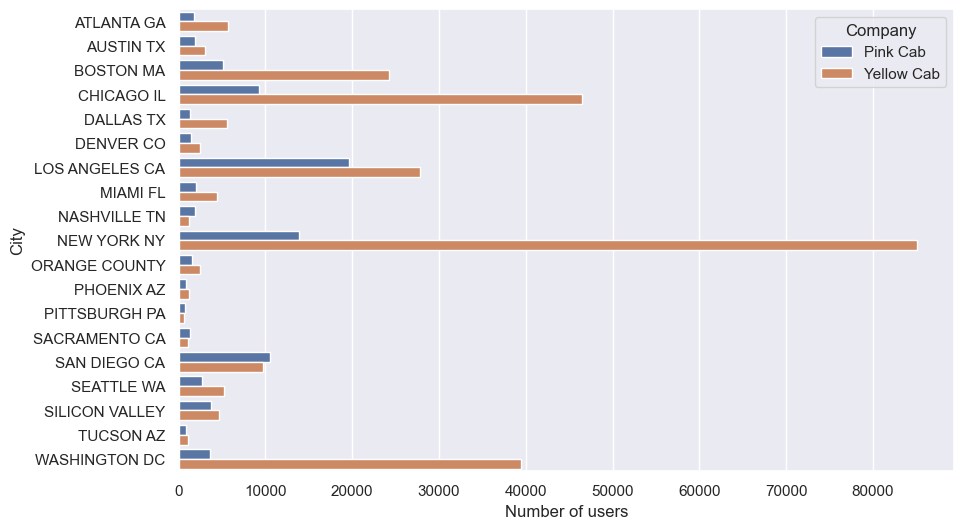

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(y='City',x='Number of users',data=city_data,hue='Company')
plt.show()

In [46]:
pink_city_data = city_data[city_data['Company']=='Pink Cab']
yellow_city_data = city_data[city_data['Company']=='Yellow Cab']
yellow_city_data.index = [i for i in range(0,19)]

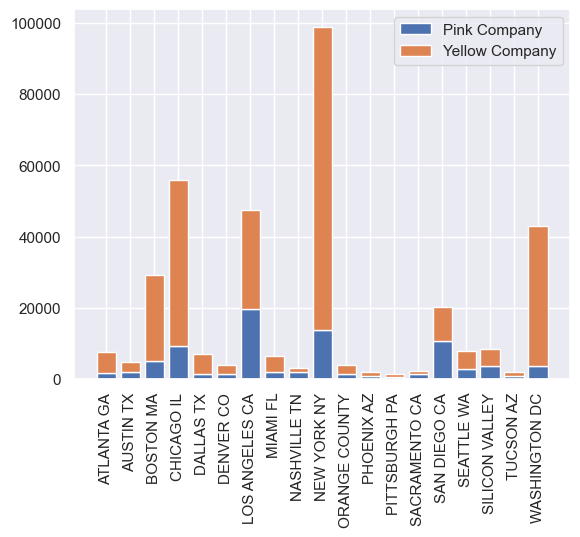

In [47]:

# Create a figure and axis
fig, ax = plt.subplots()

# Create the first set of bars
ax.bar(x=pink_city_data['City'], height=pink_city_data['Number of users'], label='Pink Company')

# Create the second set of bars, stacked on top of the first
ax.bar(x=yellow_city_data['City'], height=yellow_city_data['Number of users'], bottom=pink_city_data['Number of users'], label='Yellow Company')

# Rotate the x-axis tick labels
ax.tick_params(axis='x', rotation=90)

# Display the legend
ax.legend()

# Show the plot
plt.show()


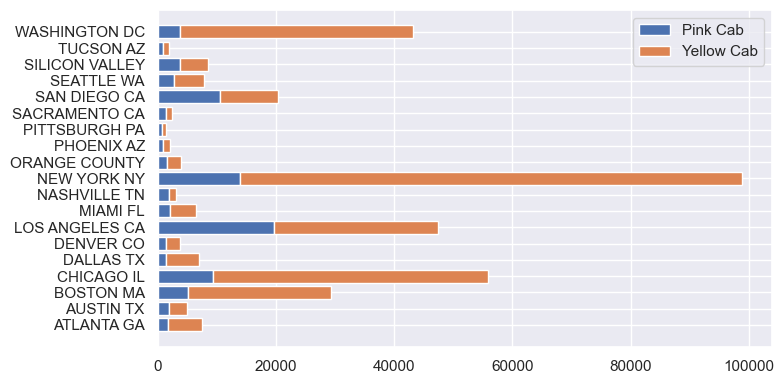

In [48]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


b1 = plt.barh(pink_city_data['City'], pink_city_data['Number of users'])

b2 = plt.barh(yellow_city_data['City'], yellow_city_data['Number of users'], left=pink_city_data['Number of users'])

plt.legend([b1, b2], ["Pink Cab", "Yellow Cab"], loc="upper right")

plt.show()

## 3. Customer Loyalty and Retention:  (LOOK AT DOING THIS BY YEAR)

"What is the customer retention rate for each cab company, and is it influenced by factors like service quality or pricing?"
"Are there specific customer segments that are more loyal to one cab company over the other?"

"Can you identify distinct customer segments based on demographic data, and how do these segments relate to the choice of cab company?"
"Are there common characteristics of high-value customers?"

Calculate RFM Metrics:

Calculate Recency, Frequency, and Monetary metrics for each customer.
Recency (R): How recently a customer made a transaction (e.g., calculate the number of days since the last cab ride).
Frequency (F): How often a customer uses a cab (e.g., calculate the total number of cab rides).
mport datetime as dtMonetary Value (M): How much money a customer spends on cabs (e.g., calculate the total spending).

In [49]:
reference_date = datetime.strptime('2019-01-01', '%Y-%m-%d')

# Calculate Recency, Frequency, and Monetary metrics
rfm_data = master_df.groupby(['Customer ID','Company']).agg({
    'Date of Travel': lambda x: (reference_date - pd.to_datetime(x.max())).days,  # Recency
    'Transaction ID': 'count',  # Frequency
    'Price Charged': 'sum'  # Monetary Value
}).reset_index()

rfm_data.columns = ['Customer ID','Company' ,'Recency', 'Frequency', 'Monetary']

In [50]:
rfm_data

,Customer ID,Company,Recency,Frequency,Monetary
0,1,Pink Cab,387,4,2286.48
1,1,Yellow Cab,16,25,15203.65
2,2,Pink Cab,298,4,1594.71
3,2,Yellow Cab,16,36,22398.15
4,3,Pink Cab,35,6,2854.62
...,...,...,...,...,...
71924,59998,Yellow Cab,108,5,2085.88
71925,59999,Pink Cab,27,2,611.01
71926,59999,Yellow Cab,61,6,1751.19
71927,60000,Pink Cab,1,4,1836.75


In [51]:
rfm_data.describe()

,Customer ID,Recency,Frequency,Monetary
count,71929.000000,71929.000000,71929.000000,71929.000000
mean,26016.347370,293.409112,4.935867,2086.600151
std,18485.764768,284.121154,6.538233,3610.284791
min,1.000000,1.000000,1.000000,15.600000
25%,9132.000000,53.000000,1.000000,393.290000
50%,22983.000000,179.000000,2.000000,814.190000
75%,38712.000000,464.000000,6.000000,2028.580000
max,60000.000000,1066.000000,47.000000,32351.360000


Segment Customers:

Divide customers into segments based on quantiles or predefined thresholds for Recency, Frequency, and Monetary metrics.

In [52]:
# Define quantiles or thresholds for segmentation
recency_thresholds = [0, 30, 90, 180, 365,float('inf')]
frequency_thresholds = [0, 15,30,float('inf')]
monetary_thresholds = [0,1000,5000,10000,30000,float('inf')]

# Create segments based on quantiles or thresholds
rfm_data['R_Segment'] = pd.cut(rfm_data['Recency'], bins=recency_thresholds, labels=False)
rfm_data['F_Segment'] = pd.cut(rfm_data['Frequency'], bins=frequency_thresholds, labels=False)
rfm_data['M_Segment'] = pd.cut(rfm_data['Monetary'], bins=monetary_thresholds, labels=False)


In [53]:
rfm_data['RFM_Segment'] = rfm_data['R_Segment'].astype(str) + rfm_data['F_Segment'].astype(str) + rfm_data['M_Segment'].astype(str)

In [54]:
rfm_data.head()

,Customer ID,Company,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Segment
0,1,Pink Cab,387,4,2286.48,4,0,1,401
1,1,Yellow Cab,16,25,15203.65,0,1,3,013
2,2,Pink Cab,298,4,1594.71,3,0,1,301
3,2,Yellow Cab,16,36,22398.15,0,2,3,023
4,3,Pink Cab,35,6,2854.62,1,0,1,101


In [55]:
# Merge RFM data with customer data
merged_data = pd.merge(customers_df, rfm_data, on='Customer ID', how='inner')

# Compare loyalty for each cab company
loyalty_comparison = merged_data.groupby(['RFM_Segment', 'Company']).size().unstack(fill_value=0)
loyalty_comparison.head()

Company,Pink Cab,Yellow Cab
RFM_Segment,,
000,1503,1144
001,1846,3053
002,5,684
003,0,1
011,1,58


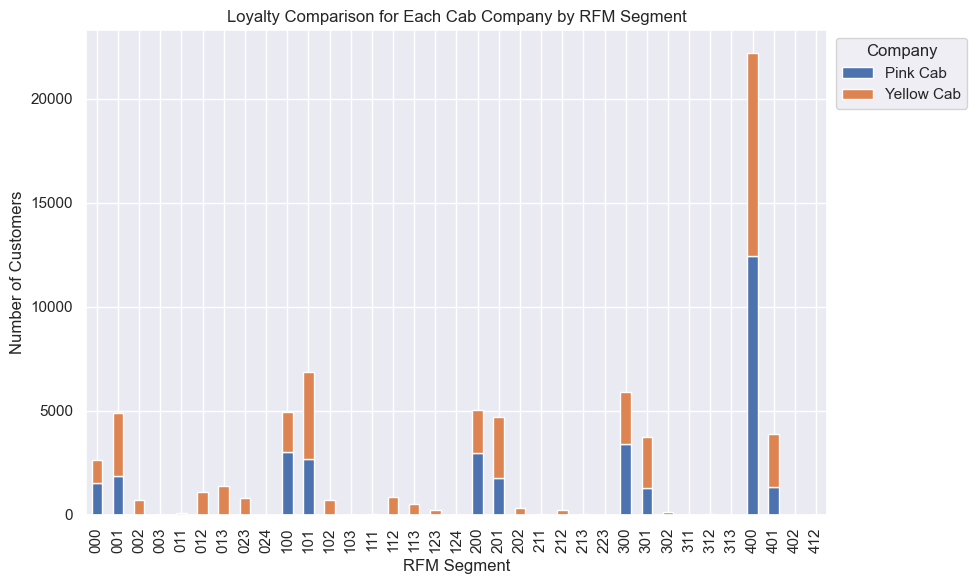

In [56]:
# Plot the loyalty comparison
loyalty_comparison.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loyalty Comparison for Each Cab Company by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.legend(title='Company', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

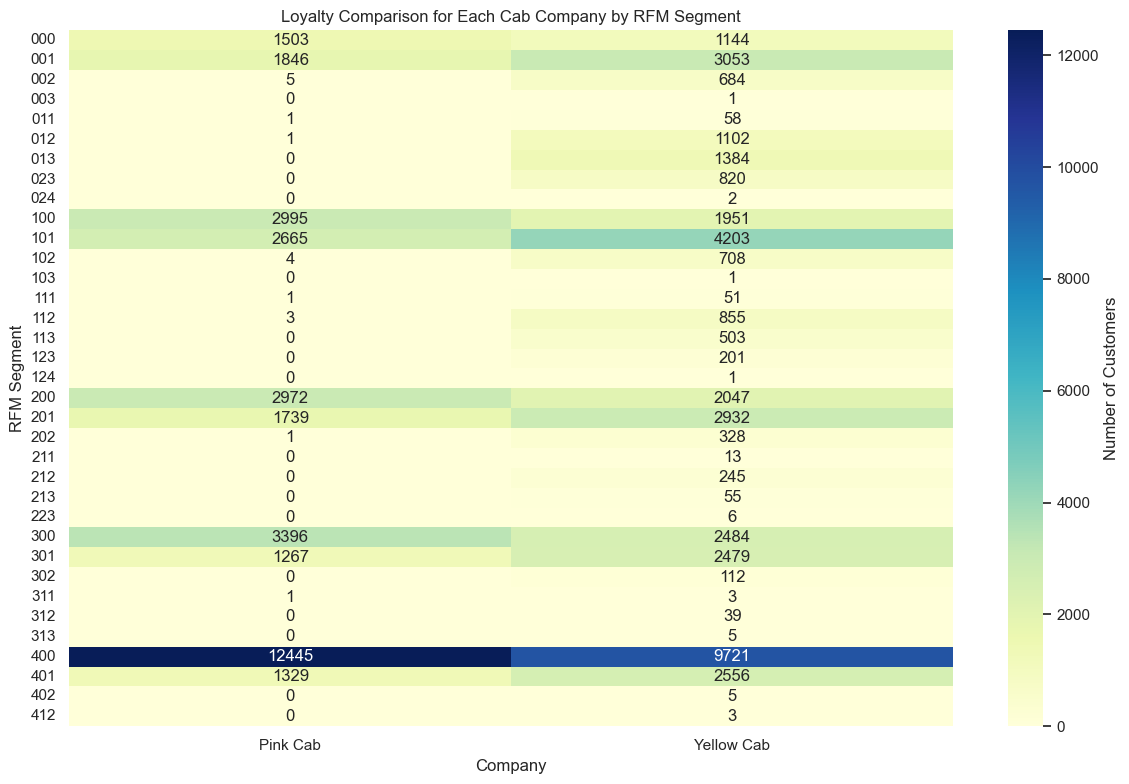

In [57]:
# Plot the loyalty comparison as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loyalty_comparison, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Customers'})
plt.title('Loyalty Comparison for Each Cab Company by RFM Segment')
plt.xlabel('Company')
plt.ylabel('RFM Segment')
plt.show()


## 4. Customer segmentation 

"Can you identify distinct customer segments based on demographic data, and how do these segments relate to the choice of cab company?"
"Are there common characteristics of high-value customers?"

In [58]:
df = master_df.copy()
df['Year'] = df['Date of Travel'].dt.year

In [59]:
df.Age.describe()

count    355032.000000
mean         35.335933
std          12.593311
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

In [60]:
young_threshold = 29 
old_threshold = 49

# Categorize the ages
df['Age_bin'] = pd.cut(df['Age'], bins=[0, young_threshold, old_threshold, float('inf')],
labels=['18-29', '30-49', '50-65'])


In [61]:
customers = df.groupby(['Year','Company']).agg({
    'Customer ID': 'count',
    'Age_bin': [lambda x: x.eq('18-29').sum(), lambda x: x.eq('30-49').sum(),lambda x: x.eq('50-65').sum()],
    'Gender': [lambda x: x.eq('Male').sum(), lambda x: x.eq('Female').sum()],
    'Income (USD/Month)': 'mean',
    'Payment_Mode': [lambda x: x.eq('Cash').sum(), lambda x: x.eq('Card').sum()]      
}).reset_index()

customers.columns = ['Year','Company','Number of users','Ages: 18-29',
                     'Ages: 30-49','Ages: 50-65','Number of Males','Number of Females',
                     'Average Income','Total cash payments','Total card payments']


In [62]:
customers

,Year,Company,Number of users,Ages: 18-29,Ages: 30-49,Ages: 50-65,Number of Males,Number of Females,Average Income,Total cash payments,Total card payments
0,2016,Pink Cab,24194,9362,10625,4207,13361,10833,15127.599446,9714,14480
1,2016,Yellow Cab,78765,30265,35212,13288,45270,33495,15030.987913,31531,47234
2,2017,Pink Cab,30321,11922,13281,5118,16846,13475,15058.789123,12197,18124
3,2017,Yellow Cab,98189,38003,43622,16564,56404,41785,15069.108974,39350,58839
4,2018,Pink Cab,29310,11340,13046,4924,16178,13132,15003.528420,11712,17598
5,2018,Yellow Cab,94253,36292,42034,15927,53899,40354,15031.072146,37649,56604


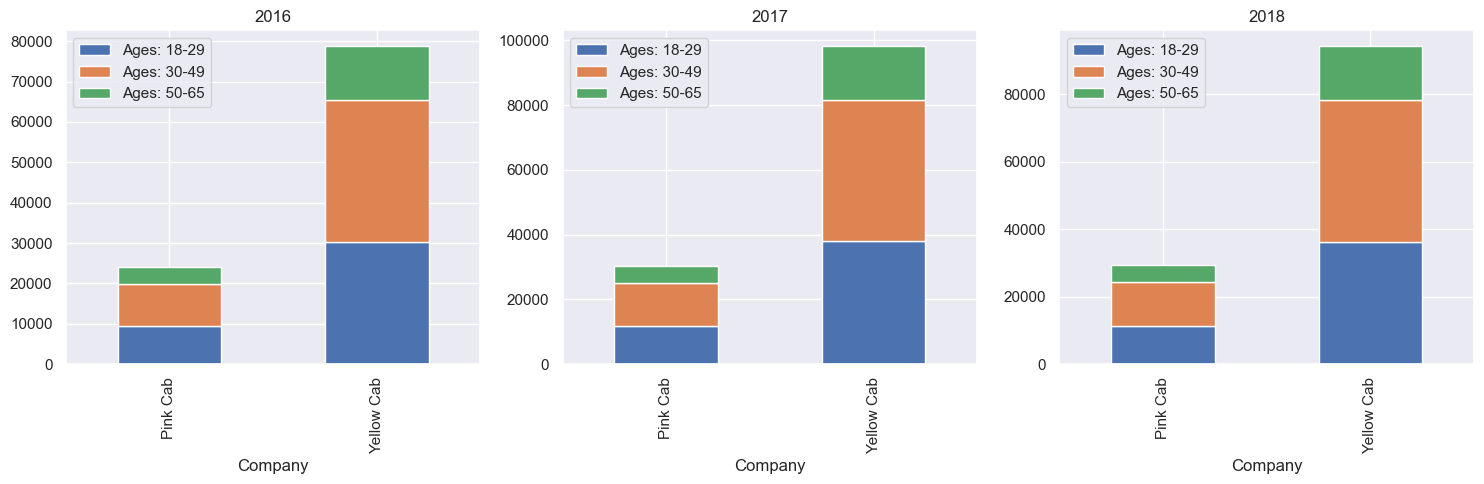

In [63]:
customers_2016 = customers[customers['Year']==2016]
customers_2017 = customers[customers['Year']==2017]
customers_2018 = customers[customers['Year']==2018]


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for 2016
customers_2016[['Company', 'Ages: 18-29', 'Ages: 30-49', 'Ages: 50-65']].plot('Company', kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('2016')

# Plot for 2017
customers_2017[['Company', 'Ages: 18-29', 'Ages: 30-49', 'Ages: 50-65']].plot('Company', kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('2017')

# Plot for 2018
customers_2018[['Company', 'Ages: 18-29', 'Ages: 30-49', 'Ages: 50-65']].plot('Company', kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('2018')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


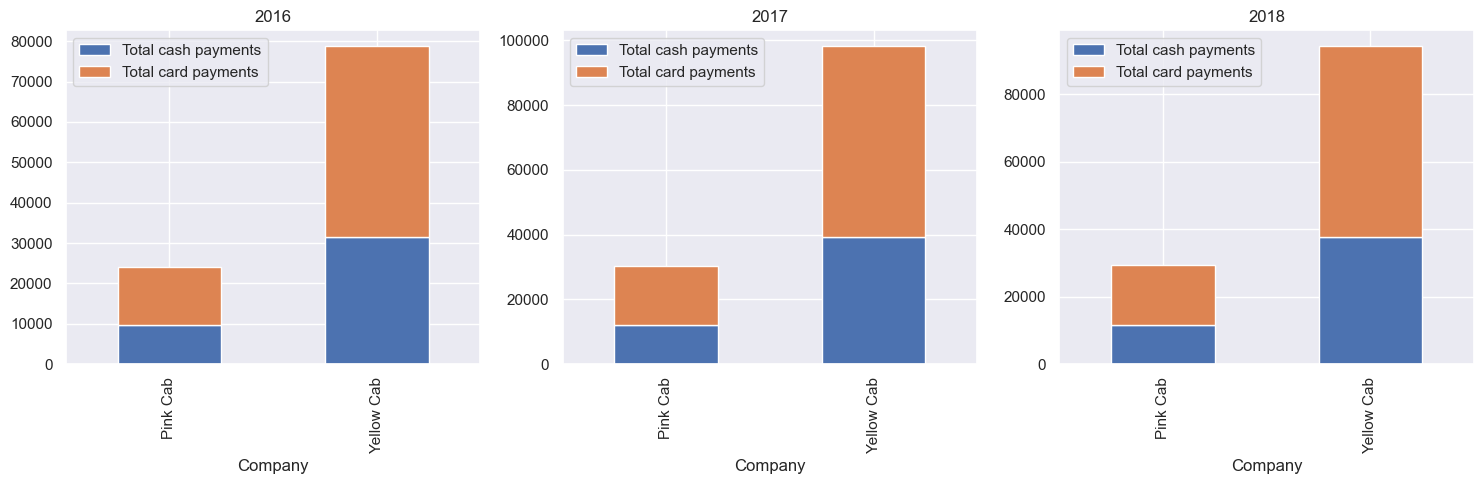

In [64]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for 2016
customers_2016[['Company', 'Total cash payments', 'Total card payments']].plot('Company', kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('2016')

# Plot for 2017
customers_2017[['Company', 'Total cash payments', 'Total card payments']].plot('Company', kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('2017')

# Plot for 2018
customers_2018[['Company', 'Total cash payments', 'Total card payments']].plot('Company', kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('2018')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## 5. Profit Analysis


### Revenue

In [65]:
new_data = master_df.copy()
new_data['Year'] = new_data['Date of Travel'].dt.year

### Create profit dataframe
Profit_data = new_data.groupby(['Year','Company']).agg({
    'Price Charged': 'sum',
    'Cost of Trip': 'sum',
    'Transaction ID': 'nunique',
    'KM Travelled': 'sum'
}).reset_index()

Profit_data.columns = ['Year','Company','Revenue','Costs','Number of Trips','Total KM Travelled']


### profit feature
Profit_data['Profit'] = Profit_data['Revenue'] - Profit_data['Costs']
Profit_data['Profit Margin'] = Profit_data['Profit']/Profit_data['Revenue']
Profit_data['Profit per trip']=Profit_data['Profit']/Profit_data['Number of Trips']
Profit_data['Profit per KM']=Profit_data['Profit']/Profit_data['Total KM Travelled']

In [66]:
## Create pink cab dataframe
pink_profit_df = Profit_data[Profit_data['Company']=='Pink Cab'] 

## Create yellow cab dataframe
yellow_profit_df = Profit_data[Profit_data['Company']=='Yellow Cab']

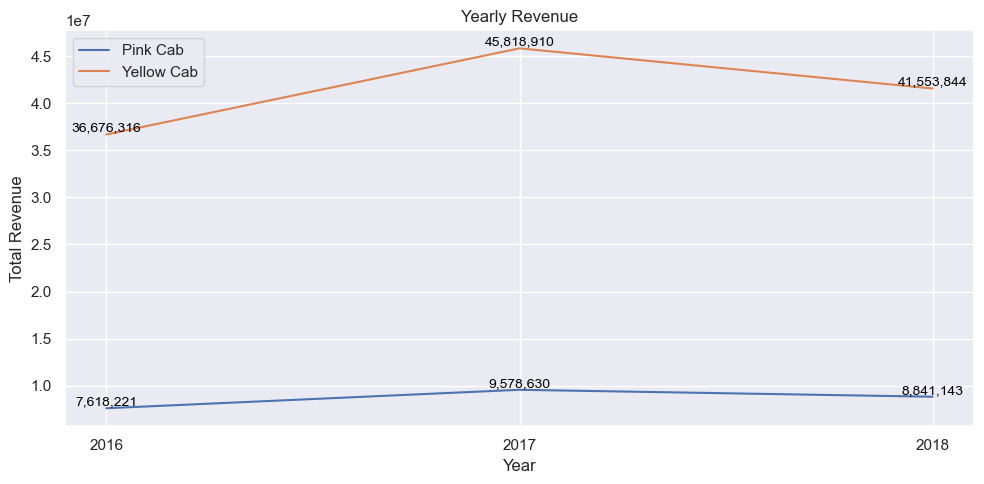

In [67]:
# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(pink_profit_df['Year'], pink_profit_df['Revenue'], label='Pink Cab')
plt.plot(yellow_profit_df['Year'], yellow_profit_df['Revenue'], label='Yellow Cab')

# Adding data labels
for i, year in enumerate(pink_profit_df['Year']):
    plt.text(year, pink_profit_df['Revenue'].iloc[i], f'{pink_profit_df["Revenue"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

for i, year in enumerate(yellow_profit_df['Year']):
    plt.text(year, yellow_profit_df['Revenue'].iloc[i], f'{yellow_profit_df["Revenue"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

# Set x-axis ticks to integers
plt.xticks(pink_profit_df['Year'].unique())

plt.title('Yearly Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.show()


### Costs

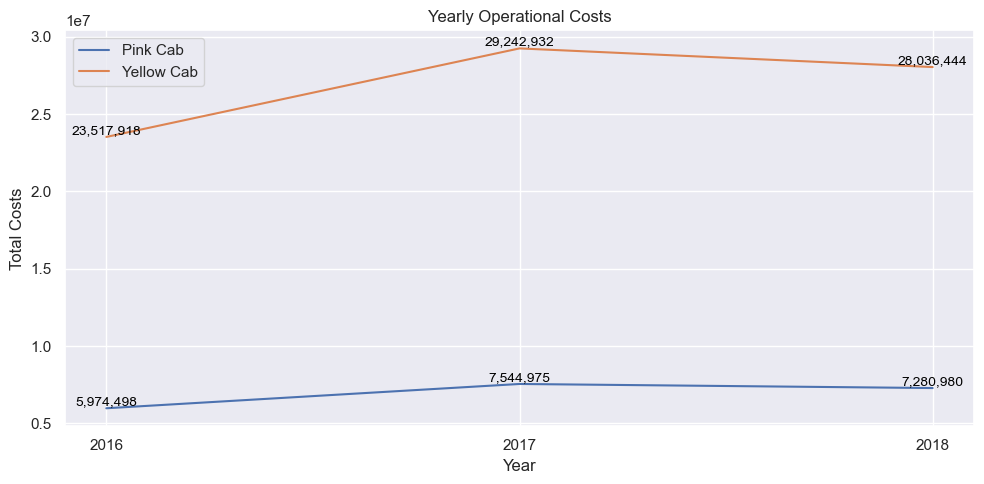

In [68]:
# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(pink_profit_df['Year'], pink_profit_df['Costs'], label='Pink Cab')
plt.plot(yellow_profit_df['Year'], yellow_profit_df['Costs'], label='Yellow Cab')

# Adding data labels
for i, year in enumerate(pink_profit_df['Year']):
    plt.text(year, pink_profit_df['Costs'].iloc[i], f'{pink_profit_df["Costs"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

for i, year in enumerate(yellow_profit_df['Year']):
    plt.text(year, yellow_profit_df['Costs'].iloc[i], f'{yellow_profit_df["Costs"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

# Set x-axis ticks to integers
plt.xticks(pink_profit_df['Year'].unique())

plt.title('Yearly Operational Costs')
plt.xlabel('Year')
plt.ylabel('Total Costs')
plt.legend()
plt.grid(True)
plt.show()


### Profit

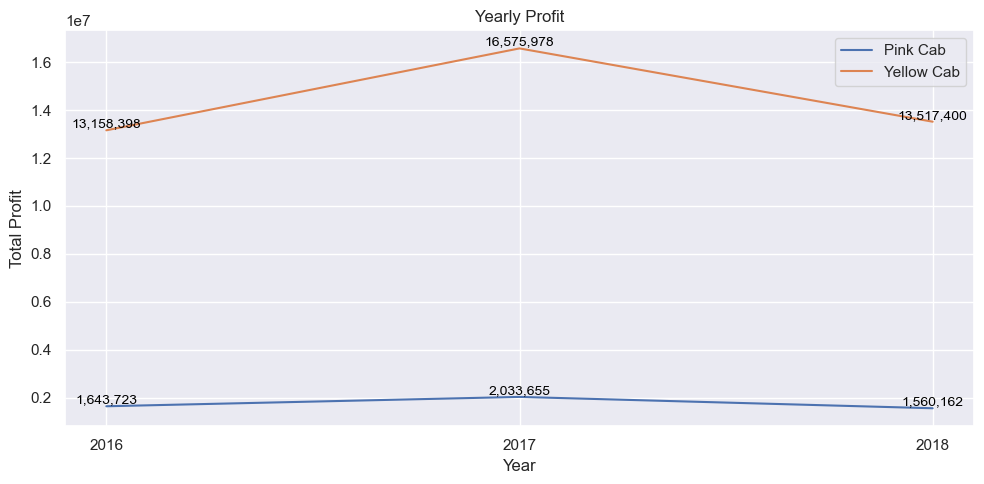

In [69]:
# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(pink_profit_df['Year'], pink_profit_df['Profit'], label='Pink Cab')
plt.plot(yellow_profit_df['Year'], yellow_profit_df['Profit'], label='Yellow Cab')

# Adding data labels
for i, year in enumerate(pink_profit_df['Year']):
    plt.text(year, pink_profit_df['Profit'].iloc[i], f'{pink_profit_df["Profit"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

for i, year in enumerate(yellow_profit_df['Year']):
    plt.text(year, yellow_profit_df['Profit'].iloc[i], f'{yellow_profit_df["Profit"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

# Set x-axis ticks to integers
plt.xticks(pink_profit_df['Year'].unique())

plt.title('Yearly Profit')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend()
plt.grid(True)
plt.show()


### Profit Margin

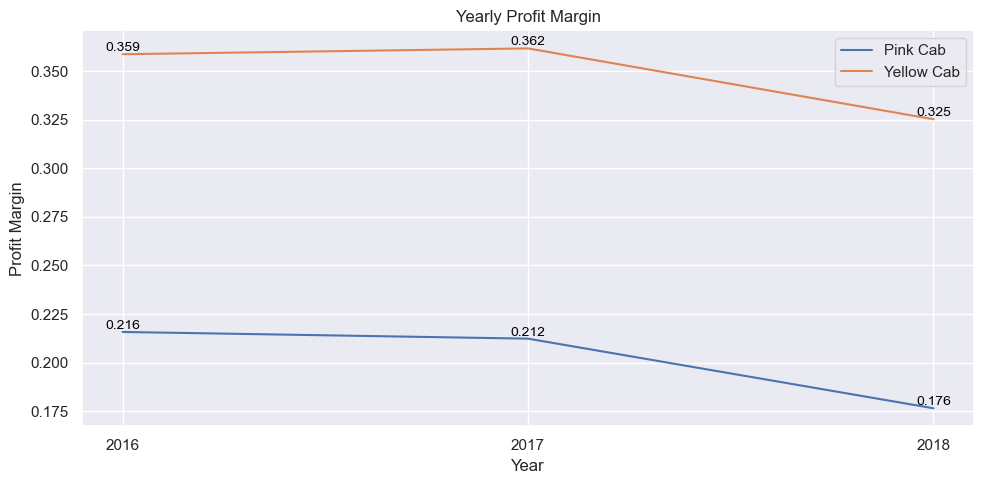

In [70]:
# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(pink_profit_df['Year'], pink_profit_df['Profit Margin'], label='Pink Cab')
plt.plot(yellow_profit_df['Year'], yellow_profit_df['Profit Margin'], label='Yellow Cab')

# Adding data labels
for i, year in enumerate(pink_profit_df['Year']):
    plt.text(year, pink_profit_df['Profit Margin'].iloc[i], f'{pink_profit_df["Profit Margin"].iloc[i]:,.3f}', ha='center', va='bottom',color='black', fontsize=10)

for i, year in enumerate(yellow_profit_df['Year']):
    plt.text(year, yellow_profit_df['Profit Margin'].iloc[i], f'{yellow_profit_df["Profit Margin"].iloc[i]:,.3f}', ha='center', va='bottom',color='black', fontsize=10)

# Set x-axis ticks to integers
plt.xticks(pink_profit_df['Year'].unique())

plt.title('Yearly Profit Margin')
plt.xlabel('Year')
plt.ylabel('Profit Margin')
plt.legend()
plt.grid(True)
plt.show()

### Profit per trip and per KM 

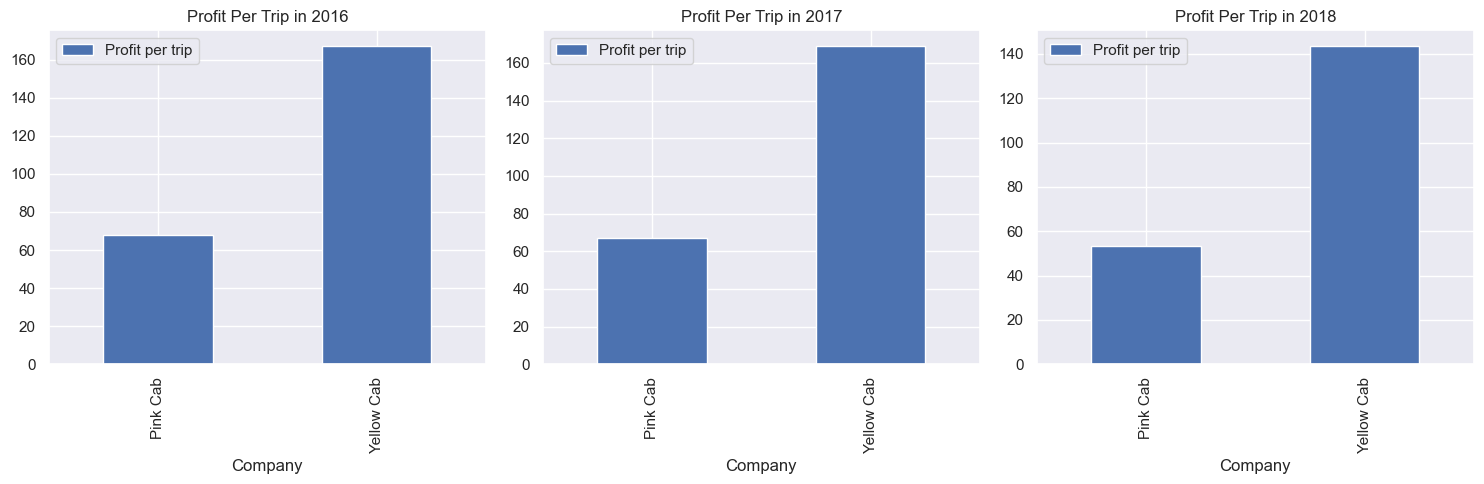

In [71]:
profit_2016 = Profit_data[Profit_data['Year']==2016]
profit_2017 = Profit_data[Profit_data['Year']==2017]
profit_2018 = Profit_data[Profit_data['Year']==2018]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for 2016
profit_2016[['Company','Profit per trip']].plot('Company', kind='bar', ax=axs[0])
axs[0].set_title('Profit Per Trip in 2016')

# Plot for 2017
profit_2017[['Company', 'Profit per trip']].plot('Company', kind='bar', ax=axs[1])
axs[1].set_title('Profit Per Trip in 2017')

# Plot for 2018
profit_2018[['Company', 'Profit per trip']].plot('Company', kind='bar', ax=axs[2])
axs[2].set_title('Profit Per Trip in 2018')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

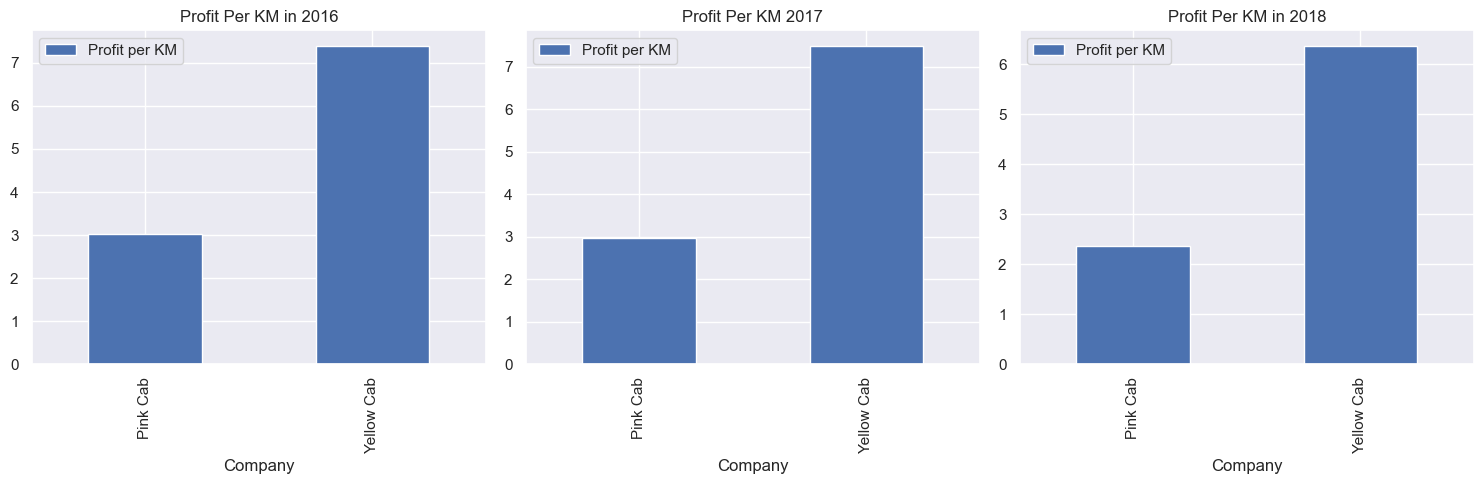

In [72]:
profit_2016 = Profit_data[Profit_data['Year']==2016]
profit_2017 = Profit_data[Profit_data['Year']==2017]
profit_2018 = Profit_data[Profit_data['Year']==2018]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for 2016
profit_2016[['Company','Profit per KM']].plot('Company', kind='bar', ax=axs[0])
axs[0].set_title('Profit Per KM in 2016')

# Plot for 2017
profit_2017[['Company', 'Profit per KM']].plot('Company', kind='bar', ax=axs[1])
axs[1].set_title('Profit Per KM 2017')

# Plot for 2018
profit_2018[['Company', 'Profit per KM']].plot('Company', kind='bar', ax=axs[2])
axs[2].set_title('Profit Per KM in 2018')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

A profit analysis for the cab investment problem involves assessing the financial performance of the investment and understanding the revenue, costs, and profitability associated with each cab company. Here are some questions you might want to answer and steps to perform a profit analysis in Python:

1. **Calculate Revenue Metrics:**
   - **Question:** What is the total revenue generated by each cab company during the specified time period?
   - **Steps:**
     - Use the transaction data to calculate the total revenue for each cab company.
     - Explore revenue trends over time.

2. **Calculate Cost Metrics:**
   - **Question:** What are the costs associated with each cab company, and how do they contribute to overall expenses?
   - **Steps:**
     - Calculate the total cost of trips for each cab company.
     - Explore cost trends over time.
     - Analyze the relationship between costs and revenue.

3. **Calculate Profit Metrics:**
   - **Question:** What is the overall profit for each cab company, and how does it vary over time?
   - **Steps:**
     - Subtract the total costs from the total revenue for each cab company.
     - Explore profit trends over time.

4. **Analyze Profit Margins:**
   - **Question:** What are the profit margins for each cab company, and how do they compare?
   - **Steps:**
     - Calculate profit margins by dividing profit by revenue for each cab company.
     - Explore profit margin trends over time.

5. **Identify High-Value Customers:**
   - **Question:** Who are the high-value customers, and how do they contribute to profitability?
   - **Steps:**
     - Identify and analyze customers with high spending or frequency.

6. **Compare Cab Companies:**
   - **Question:** Which cab company is more profitable, and what factors contribute to the difference?
   - **Steps:**
     - Compare the financial metrics (revenue, costs, profit) for each cab company.
     - Identify key drivers of profitability differences.

7. **Evaluate Return on Investment (ROI):**
   - **Question:** What is the return on investment for each cab company?
   - **Steps:**
     - Calculate ROI by dividing the profit by the initial investment.

8. **Consider External Factors:**
   - **Question:** How do external factors (e.g., holidays, weather) impact profitability?
   - **Steps:**
     - Incorporate external datasets (e.g., holiday data, weather data) to analyze their impact on profitability.

9. **Visualize Results:**
   - **Question:** How can I visually represent the profit analysis results for better understanding?
   - **Steps:**
     - Use visualizations such as line charts, bar charts, or heatmaps to represent revenue, costs, and profit metrics.

10. **Make Recommendations:**
    - **Question:** Based on the profit analysis, which cab company is a better investment opportunity?
    - **Steps:**
      - Summarize key findings and make data-driven recommendations for the investment decision.


## 6. Market Share

In [73]:
market_data = Profit_data.loc[:,['Year','Company','Revenue']]

# Calculate the Total Revenue
Total_revenue = market_data['Revenue'].sum()

# Calculate the market share of each cab company for each time period
market_data['Market Share'] = (market_data['Revenue'] /Total_revenue)  * 100


In [74]:
market_data

,Year,Company,Revenue,Market Share
0,2016,Pink Cab,7618220.67,5.075868
1,2016,Yellow Cab,36676315.51,24.436694
2,2017,Pink Cab,9578629.54,6.382049
3,2017,Yellow Cab,45818910.04,30.528221
4,2018,Pink Cab,8841142.56,5.890676
5,2018,Yellow Cab,41553843.97,27.686493


In [75]:
# Assuming Profit_data is your original DataFrame
# market_data = Profit_data.loc[:,['Year','Company','Revenue']]

# Calculate the Total Revenue
Total_revenue = market_data['Revenue'].sum()

# Calculate the market share of each cab company for each time period
market_data['Market Share'] = (market_data['Revenue'] / Total_revenue) * 100

# Group by 'Company' for the calculation of change in market share
grouped_data = market_data.groupby('Company')

# Calculate the change in market share
market_data['Change in Market Share'] = grouped_data['Market Share'].diff()

# Shift the change to align it correctly 'Company')
market_data['Change in Market Share'] = market_data.groupby('Company')['Change in Market Share'].shift(-1)

market_data.fillna(0,inplace=True)
# Display the DataFrame with the added feature
print(market_data)

   Year     Company      Revenue  Market Share  Change in Market Share
0  2016    Pink Cab   7618220.67      5.075868                1.306181
1  2016  Yellow Cab  36676315.51     24.436694                6.091527
2  2017    Pink Cab   9578629.54      6.382049               -0.491373
3  2017  Yellow Cab  45818910.04     30.528221               -2.841728
4  2018    Pink Cab   8841142.56      5.890676                0.000000
5  2018  Yellow Cab  41553843.97     27.686493                0.000000


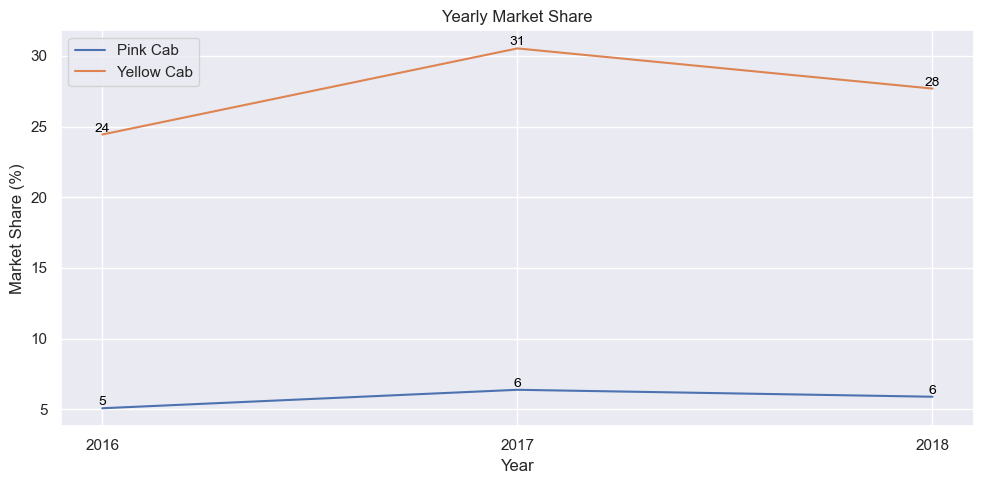

In [76]:
## Create pink cab dataframe
pink_market_data = market_data[market_data['Company']=='Pink Cab'] 
## Create yellow cab dataframe
yellow_market_data = market_data[market_data['Company']=='Yellow Cab']


plt.figure(figsize=(10, 5))
plt.plot(pink_market_data['Year'], pink_market_data['Market Share'], label='Pink Cab')
plt.plot(yellow_market_data['Year'], yellow_market_data['Market Share'], label='Yellow Cab')

# Adding data labels
for i, year in enumerate(pink_market_data['Year']):
    plt.text(year, pink_market_data['Market Share'].iloc[i], f'{pink_market_data["Market Share"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

for i, year in enumerate(yellow_market_data['Year']):
    plt.text(year, yellow_market_data['Market Share'].iloc[i], f'{yellow_market_data["Market Share"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

# Set x-axis ticks to integers
plt.xticks(pink_profit_df['Year'].unique())

plt.title('Yearly Market Share')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend()
plt.grid(True)
plt.show()


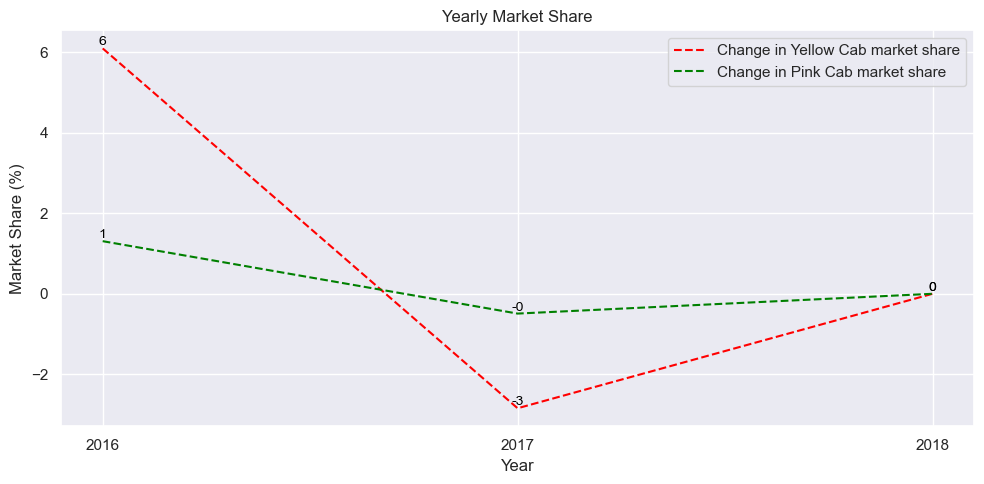

In [77]:
plt.figure(figsize=(10, 5))
plt.plot(yellow_market_data['Year'], yellow_market_data['Change in Market Share'],ls='--' ,label='Change in Yellow Cab market share',color='red')
plt.plot(yellow_market_data['Year'], pink_market_data['Change in Market Share'],ls='--' ,label='Change in Pink Cab market share',color='green')

# Adding data labels
for i, year in enumerate(pink_market_data['Year']):
    plt.text(year, pink_market_data['Change in Market Share'].iloc[i], f'{pink_market_data["Change in Market Share"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

for i, year in enumerate(yellow_market_data['Year']):
    plt.text(year, yellow_market_data['Change in Market Share'].iloc[i], f'{yellow_market_data["Change in Market Share"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

# Set x-axis ticks to integers
plt.xticks(pink_profit_df['Year'].unique())

plt.title('Yearly Market Share')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend()
plt.grid(True)
plt.show()


## 7. Time Based Analysis

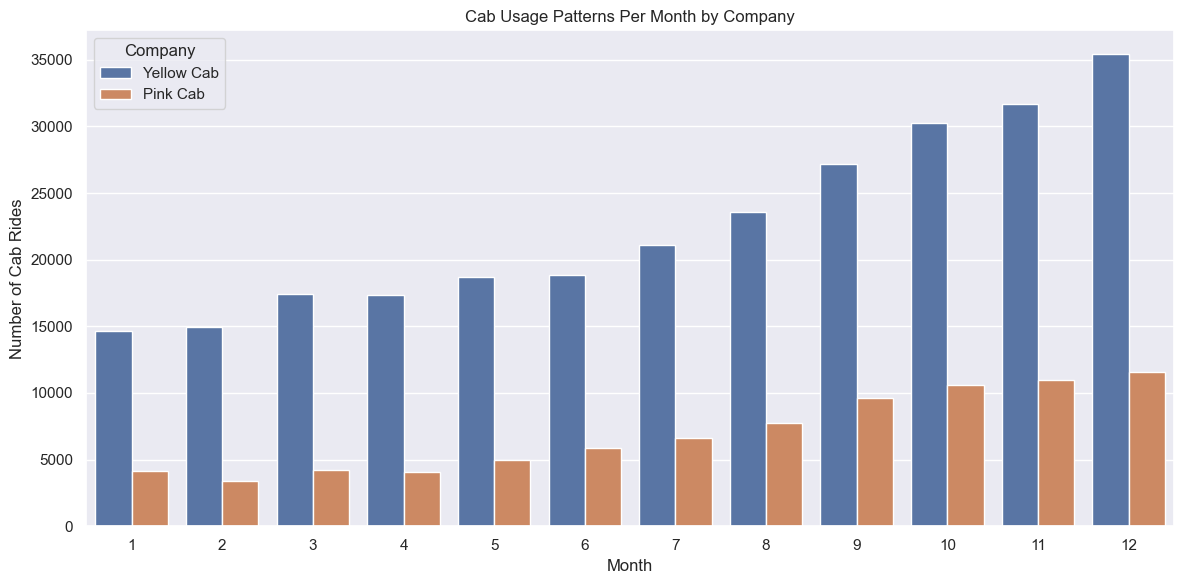

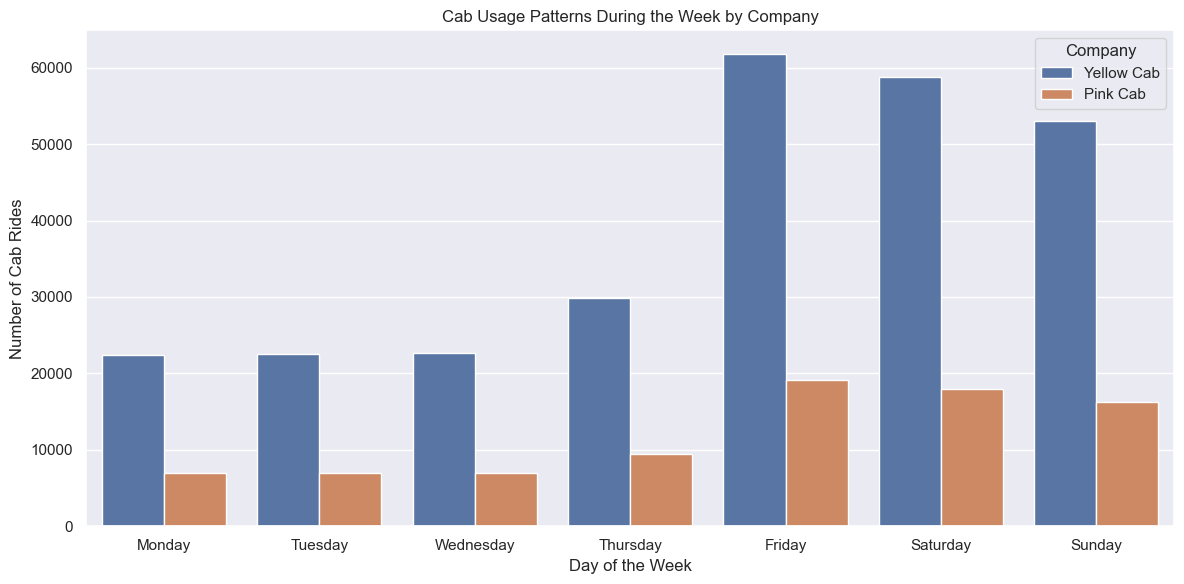

In [87]:
cab_data = master_df.loc[:,['Date of Travel','Company','Users']]
# Extract relevant time-related features
cab_data['month'] = cab_data['Date of Travel'].dt.month
cab_data['Day_of_Week'] = cab_data['Date of Travel'].dt.day_name()

# Plot usage patterns during the day for each cab company
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='Company', data=cab_data)
plt.title('Cab Usage Patterns Per Month by Company')
plt.xlabel('Month')
plt.ylabel('Number of Cab Rides')
plt.legend(title='Company')
plt.show()

# Plot usage patterns during the week for each cab company
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Company', data=cab_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Cab Usage Patterns During the Week by Company')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cab Rides')
plt.legend(title='Company')
plt.show()


In [79]:
# # Plot the loyalty comparison
# loyalty_comparison.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.title('Loyalty Comparison for Each Cab Company by RFM Segment')
# plt.xlabel('RFM Segment')
# plt.ylabel('Number of Customers')
# plt.legend(title='Company', loc='upper right', bbox_to_anchor=(1.2, 1))
# plt.show()